In [1]:
import pandas as pd
import numpy as np
import datetime
import warnings

warnings.filterwarnings('ignore')
warnings.filterwarnings("ignore", message="numpy.ufunc size changed")

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

%matplotlib inline

pd.set_option('display.max_columns', None)

In [2]:
customer_df = pd.read_csv('we_fn_use_c_marketing_customer_value_analysis.csv') 

In [3]:
customer_df.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [4]:
customer_df.shape

(9134, 24)

In [5]:
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   State                          9134 non-null   object 
 2   Customer Lifetime Value        9134 non-null   float64
 3   Response                       9134 non-null   object 
 4   Coverage                       9134 non-null   object 
 5   Education                      9134 non-null   object 
 6   Effective To Date              9134 non-null   object 
 7   EmploymentStatus               9134 non-null   object 
 8   Gender                         9134 non-null   object 
 9   Income                         9134 non-null   int64  
 10  Location Code                  9134 non-null   object 
 11  Marital Status                 9134 non-null   object 
 12  Monthly Premium Auto           9134 non-null   i

In [6]:
customer_df.dtypes

Customer                          object
State                             object
Customer Lifetime Value          float64
Response                          object
Coverage                          object
Education                         object
Effective To Date                 object
EmploymentStatus                  object
Gender                            object
Income                             int64
Location Code                     object
Marital Status                    object
Monthly Premium Auto               int64
Months Since Last Claim            int64
Months Since Policy Inception      int64
Number of Open Complaints          int64
Number of Policies                 int64
Policy Type                       object
Policy                            object
Renew Offer Type                  object
Sales Channel                     object
Total Claim Amount               float64
Vehicle Class                     object
Vehicle Size                      object
dtype: object

In [7]:
new_columns = []
for i in customer_df.columns:
    i = i.lower().replace(' ', '_')
    new_columns.append(i)
    
customer_df.columns = new_columns
customer_df.columns

Index(['customer', 'state', 'customer_lifetime_value', 'response', 'coverage',
       'education', 'effective_to_date', 'employmentstatus', 'gender',
       'income', 'location_code', 'marital_status', 'monthly_premium_auto',
       'months_since_last_claim', 'months_since_policy_inception',
       'number_of_open_complaints', 'number_of_policies', 'policy_type',
       'policy', 'renew_offer_type', 'sales_channel', 'total_claim_amount',
       'vehicle_class', 'vehicle_size'],
      dtype='object')

In [8]:
customer_df['effective_to_date'] = pd.to_datetime(customer_df['effective_to_date'])

In [9]:
customer_df.isna().sum()

customer                         0
state                            0
customer_lifetime_value          0
response                         0
coverage                         0
education                        0
effective_to_date                0
employmentstatus                 0
gender                           0
income                           0
location_code                    0
marital_status                   0
monthly_premium_auto             0
months_since_last_claim          0
months_since_policy_inception    0
number_of_open_complaints        0
number_of_policies               0
policy_type                      0
policy                           0
renew_offer_type                 0
sales_channel                    0
total_claim_amount               0
vehicle_class                    0
vehicle_size                     0
dtype: int64

In [10]:
np.where(customer_df.applymap(lambda x: x == '')) 

(array([], dtype=int64), array([], dtype=int64))

In [11]:
customer_df.describe()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
count,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000
mean,8004.940475,37657.380009,93.219291,15.097000,48.064594,0.384388,2.966170,434.088794
std,6870.967608,30379.904734,34.407967,10.073257,27.905991,0.910384,2.390182,290.500092
min,1898.007675,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007
25%,3994.251794,0.000000,68.000000,6.000000,24.000000,0.000000,1.000000,272.258244
50%,5780.182197,33889.500000,83.000000,14.000000,48.000000,0.000000,2.000000,383.945434
75%,8962.167041,62320.000000,109.000000,23.000000,71.000000,0.000000,4.000000,547.514839
max,83325.381190,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2893.239678


In [12]:
customer_df['income'].value_counts()

0        2317
95697      12
40864       7
24910       7
25965       7
         ... 
26952       1
84300       1
22862       1
20815       1
57240       1
Name: income, Length: 5694, dtype: int64

<AxesSubplot:xlabel='income', ylabel='Count'>

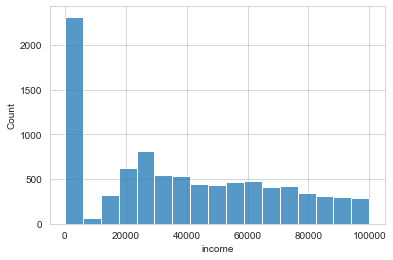

In [13]:
sns.histplot(customer_df['income'])

In [14]:
customer_df['number_of_open_complaints'].value_counts()

0    7252
1    1011
2     374
3     292
4     149
5      56
Name: number_of_open_complaints, dtype: int64

In [15]:
customer_df['income']=customer_df['income'].mask(customer_df['income']==0).fillna(customer_df['income'].median())

<AxesSubplot:xlabel='income', ylabel='Count'>

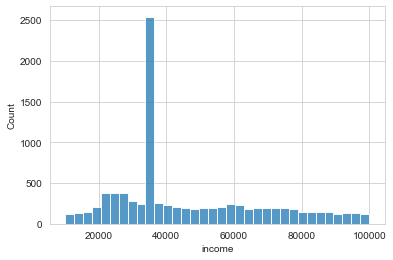

In [16]:
sns.histplot(customer_df['income'])

In [17]:
customer_df.describe()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
count,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000
mean,8004.940475,46254.048664,93.219291,15.097000,48.064594,0.384388,2.966170,434.088794
std,6870.967608,22200.666227,34.407967,10.073257,27.905991,0.910384,2.390182,290.500092
min,1898.007675,10037.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007
25%,3994.251794,33889.500000,68.000000,6.000000,24.000000,0.000000,1.000000,272.258244
50%,5780.182197,33893.250000,83.000000,14.000000,48.000000,0.000000,2.000000,383.945434
75%,8962.167041,62320.000000,109.000000,23.000000,71.000000,0.000000,4.000000,547.514839
max,83325.381190,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2893.239678


In [18]:
continuous = 'customer_lifetime_value', 'income', 'monthly_preimum_auto', 'months_since_last_claim', 'months_since_policy_inception','total_claim_amount'
discrete = 'number_of_open_complaints','number_of_policies'

In [19]:
def numerical_types(df, types):
    num_discrete = []
    num_continuous = []
    num = df.select_dtypes(include=np.number)
    for i in num.columns:
        if 'number' in i:
            num_discrete.append(i)
        else:
            num_continuous.append(i)
    if types == 'discrete':
        x = num[num_discrete]
    else:
        x = num[num_continuous]

    
    return x

    
discrete= numerical_types(customer_df,'discrete')

In [20]:
discrete= numerical_types(customer_df,'discrete')

In [21]:
discrete

,number_of_open_complaints,number_of_policies
0,0,1
1,0,8
2,0,2
3,0,7
4,0,1
...,...,...
9129,0,2
9130,0,1
9131,3,2
9132,0,3


In [22]:
continuous = numerical_types(customer_df,'continuous')

In [23]:
continuous

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,total_claim_amount
0,2763.519279,56274.0,69,32,5,384.811147
1,6979.535903,33889.5,94,13,42,1131.464935
2,12887.431650,48767.0,108,18,38,566.472247
3,7645.861827,33889.5,106,18,65,529.881344
4,2813.692575,43836.0,73,12,44,138.130879
...,...,...,...,...,...,...
9129,23405.987980,71941.0,73,18,89,198.234764
9130,3096.511217,21604.0,79,14,28,379.200000
9131,8163.890428,33889.5,85,9,37,790.784983
9132,7524.442436,21941.0,96,34,3,691.200000


In [24]:
categorical = customer_df.select_dtypes(object)

In [25]:
categorical.nunique()

customer            9134
state                  5
response               2
coverage               3
education              5
employmentstatus       5
gender                 2
location_code          3
marital_status         3
policy_type            3
policy                 9
renew_offer_type       4
sales_channel          4
vehicle_class          6
vehicle_size           3
dtype: int64

In [26]:
def get_unique_values(values):
    list_of_unique_values = []
    unique_values = set(values)
    for value in unique_values:
        list_of_unique_values.append(value)
    return list_of_unique_values

get_unique_values(customer_df.coverage)


['Premium', 'Extended', 'Basic']

In [27]:
for column in categorical:
    if column != 'customer':
        cat_column = categorical[column]
        print(column)
        #print(cat_column.unique())
        print(set(cat_column))
        print('--')

state
{'Arizona', 'Nevada', 'California', 'Washington', 'Oregon'}
--
response
{'Yes', 'No'}
--
coverage
{'Premium', 'Extended', 'Basic'}
--
education
{'College', 'High School or Below', 'Master', 'Bachelor', 'Doctor'}
--
employmentstatus
{'Employed', 'Medical Leave', 'Unemployed', 'Disabled', 'Retired'}
--
gender
{'M', 'F'}
--
location_code
{'Urban', 'Rural', 'Suburban'}
--
marital_status
{'Married', 'Single', 'Divorced'}
--
policy_type
{'Corporate Auto', 'Special Auto', 'Personal Auto'}
--
policy
{'Special L1', 'Personal L1', 'Corporate L2', 'Special L2', 'Corporate L3', 'Personal L2', 'Special L3', 'Personal L3', 'Corporate L1'}
--
renew_offer_type
{'Offer1', 'Offer2', 'Offer4', 'Offer3'}
--
sales_channel
{'Branch', 'Call Center', 'Agent', 'Web'}
--
vehicle_class
{'SUV', 'Sports Car', 'Two-Door Car', 'Luxury Car', 'Four-Door Car', 'Luxury SUV'}
--
vehicle_size
{'Small', 'Large', 'Medsize'}
--


In [28]:
customer_df = customer_df.set_index('customer')
customer_df

,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,location_code,marital_status,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
customer,,,,,,,,,,,,,,,,,,,,,,,
BU79786,Washington,2763.519279,No,Basic,Bachelor,2011-02-24,Employed,F,56274.0,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
QZ44356,Arizona,6979.535903,No,Extended,Bachelor,2011-01-31,Unemployed,F,33889.5,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
AI49188,Nevada,12887.431650,No,Premium,Bachelor,2011-02-19,Employed,F,48767.0,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
WW63253,California,7645.861827,No,Basic,Bachelor,2011-01-20,Unemployed,M,33889.5,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
HB64268,Washington,2813.692575,No,Basic,Bachelor,2011-02-03,Employed,M,43836.0,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
LA72316,California,23405.987980,No,Basic,Bachelor,2011-02-10,Employed,M,71941.0,Urban,Married,73,18,89,0,2,Personal Auto,Personal L1,Offer2,Web,198.234764,Four-Door Car,Medsize
PK87824,California,3096.511217,Yes,Extended,College,2011-02-12,Employed,F,21604.0,Suburban,Divorced,79,14,28,0,1,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize
TD14365,California,8163.890428,No,Extended,Bachelor,2011-02-06,Unemployed,M,33889.5,Suburban,Single,85,9,37,3,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize


In [29]:
continuous_df= continuous

In [30]:
discrete_df = discrete

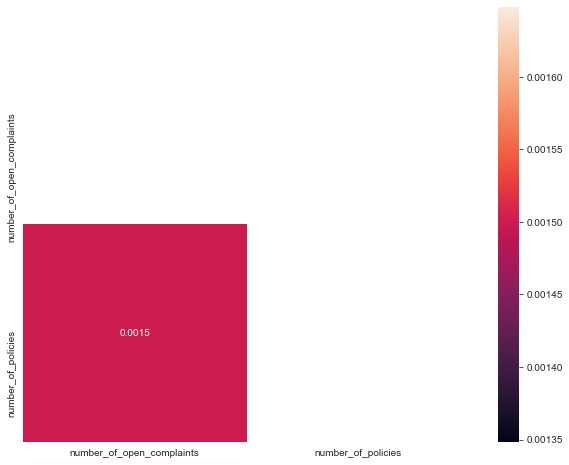

In [31]:
correlations_matrix = discrete_df.corr()
mask = np.zeros_like(correlations_matrix)
mask[np.triu_indices_from(mask)] = True
fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(correlations_matrix, mask=mask, annot=True)
plt.show()

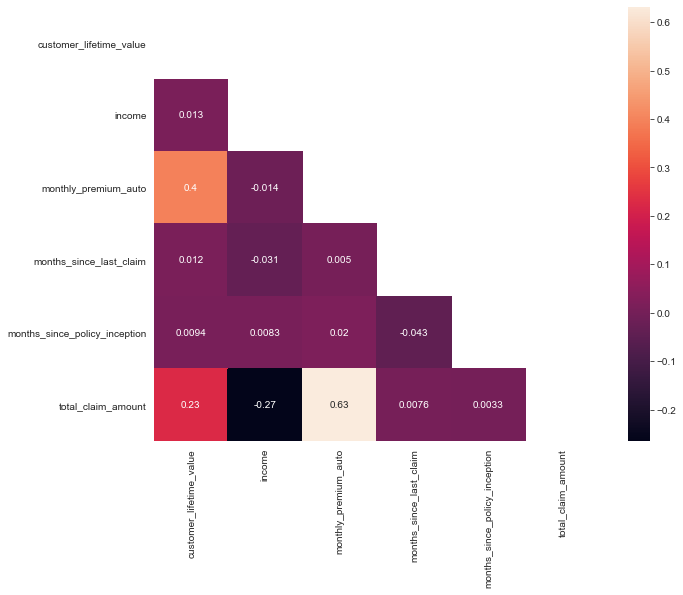

In [32]:
correlations_matrix = continuous_df.corr()
mask = np.zeros_like(correlations_matrix)
mask[np.triu_indices_from(mask)] = True
fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(correlations_matrix, mask=mask, annot=True)
plt.show()

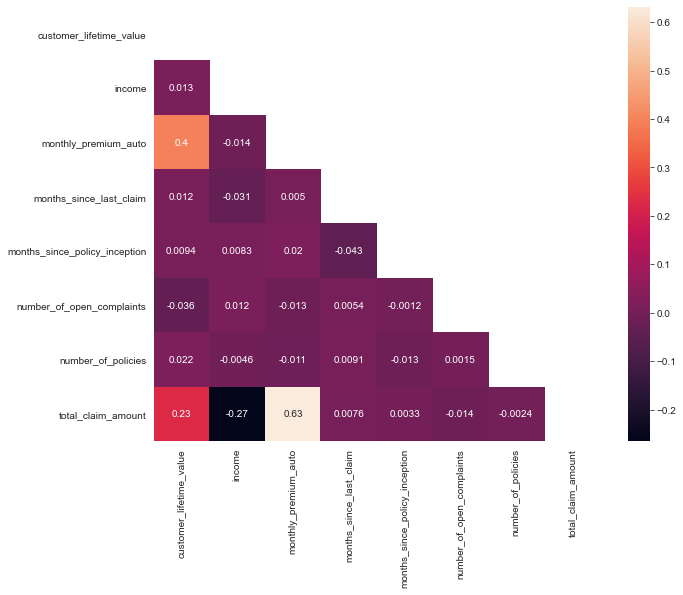

In [33]:
correlations_matrix = customer_df.corr()
mask = np.zeros_like(correlations_matrix)
mask[np.triu_indices_from(mask)] = True
fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(correlations_matrix, mask=mask, annot=True)
plt.show()

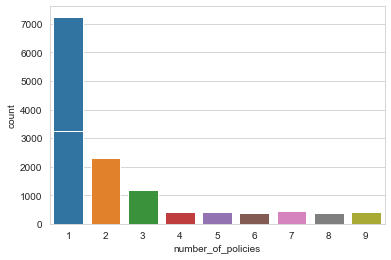

In [34]:
for i in discrete_df.columns:
    sns.countplot(x=i, data=discrete_df)

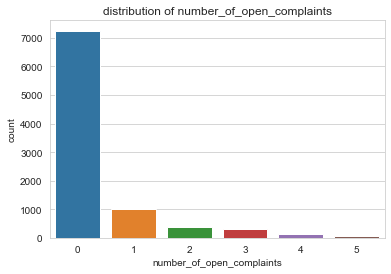

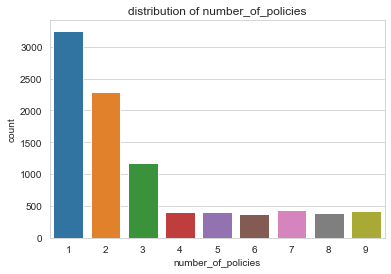

In [35]:
def plot_discrete(df):
    for i in df.columns:
        plt.figure()
        plt.title("distribution of {}".format(i))
        sns.countplot(x=i, data=df)
        
plot_discrete(discrete_df)

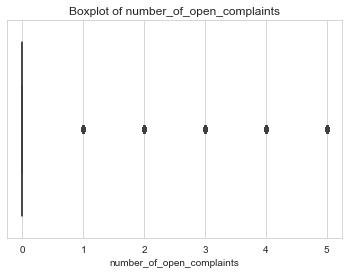

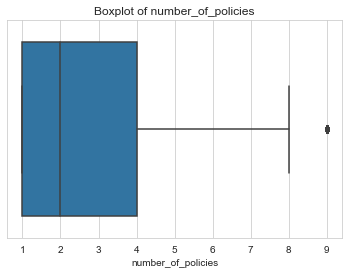

In [36]:
def plot_discrete2(df):
    for i in df.columns:
        plt.figure()
        plt.title("Boxplot of {}".format(i))
        sns.boxplot(x=i, data=df)
        
plot_discrete2(discrete_df)

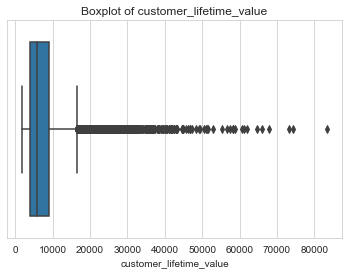

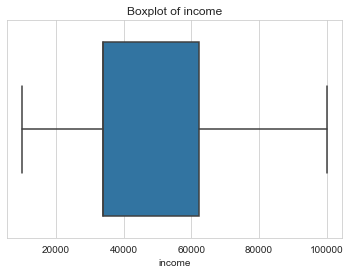

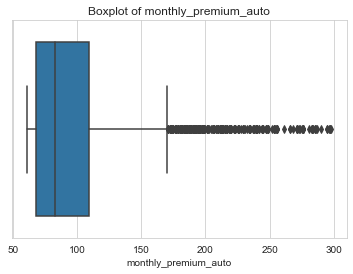

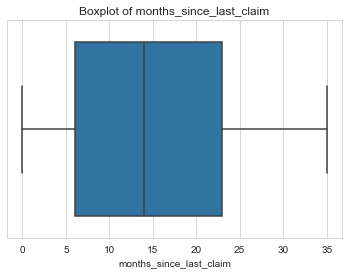

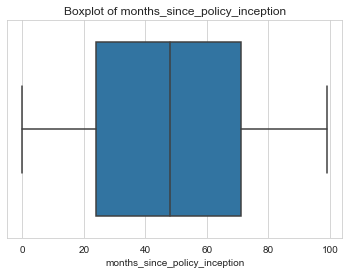

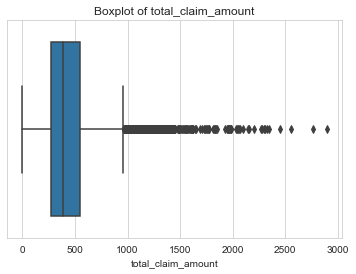

In [37]:
def plot_continuous(df):
    for i in df.columns:
        plt.figure()
        plt.title("Boxplot of {}".format(i))
        sns.boxplot(x=i, data=df)
        
plot_continuous(continuous_df)

In [38]:
#5,6,7 all the conclusions

# Lab 3 | Feature extraction

In [39]:
categorical = customer_df.select_dtypes(object)
categorical.head()

,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
customer,,,,,,,,,,,,,,
BU79786,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
QZ44356,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
AI49188,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
WW63253,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
HB64268,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize


In [40]:
def plot_categoricals(df):
    for i in df.columns:
        plt.figure()
        plt.title("plot of {}".format(i))
        sns.countplot(x=i, data=df)


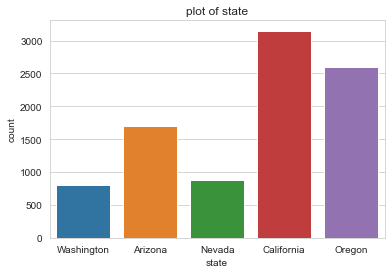

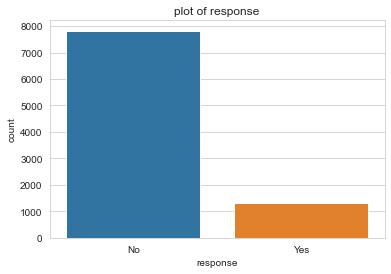

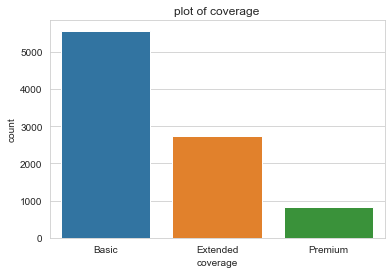

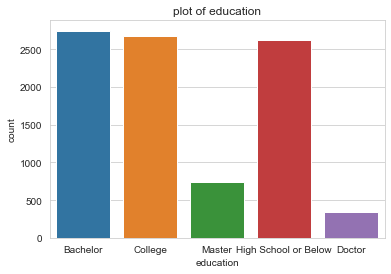

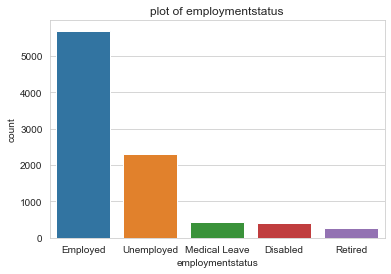

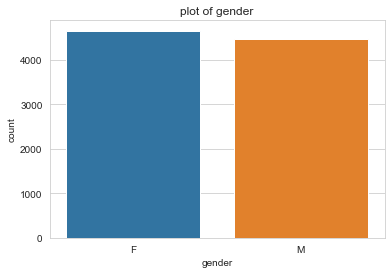

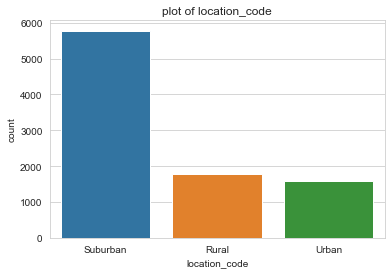

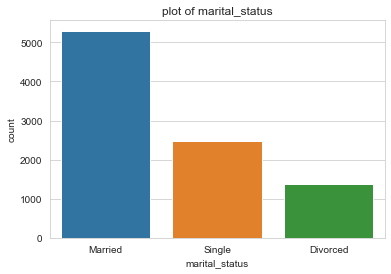

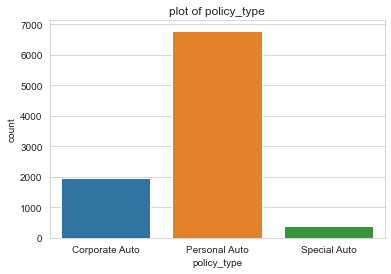

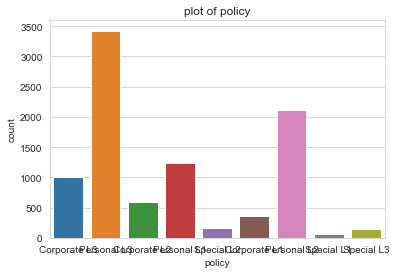

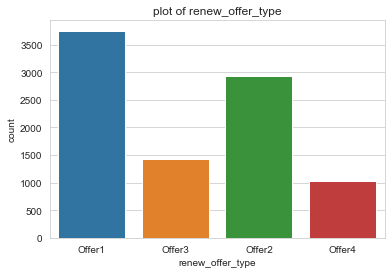

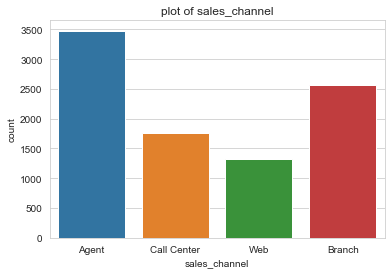

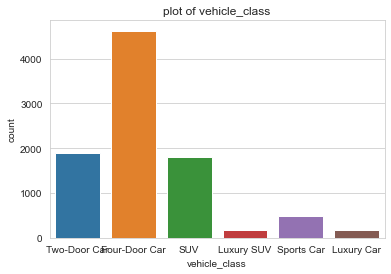

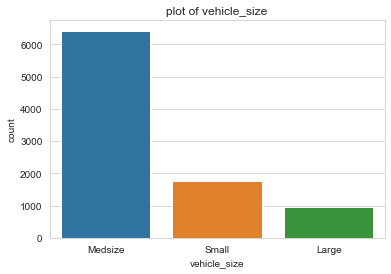

In [41]:
plot_categoricals(categorical)

In [42]:
def clean_policy_type(x):
    if x in 'Corporate Auto':
        return 2
    elif x in 'Special Auto':
        return 3
    else:
        return 1
categorical.policy_type = categorical.policy_type.apply(clean_policy_type)
categorical.policy_type.value_counts()

1    6788
2    1968
3     378
Name: policy_type, dtype: int64

In [43]:
categorical['policy'] = categorical['policy'].apply(lambda x: x[-2:])

In [44]:
categorical['policy'].unique

<bound method Series.unique of customer
BU79786    L3
QZ44356    L3
AI49188    L3
WW63253    L2
HB64268    L1
           ..
LA72316    L1
PK87824    L3
TD14365    L2
UP19263    L2
Y167826    L3
Name: policy, Length: 9134, dtype: object>

In [45]:
policy = {'L1' : 1, 'L2' : 2, 'L3' : 3}
vehicle_size = {'Medsize': 2, 'Small' : 1, 'Large' : 3}
coverage = { 'Basic' : 1, 'Extended': 2, 'Premium' : 3}
education = {'Bachelor': 3,  'College': 2, 'Master' : 4,  'High School or Below' : 1, 'Doctor' :5}
renew_offer_type = {'Offer1' :1, 'Offer3' : 3, 'Offer2' : 2, 'Offer4' :4}
                     
categorical['policy'] = categorical['policy'].replace(policy)
categorical['vehicle_size'] = categorical['vehicle_size'].replace(vehicle_size)
categorical['coverage'] = categorical['coverage'].replace(coverage)
categorical['education'] = categorical['education'].replace(education)
categorical['renew_offer_type'] = categorical['renew_offer_type'].replace(renew_offer_type)

In [46]:
categorical.head()

,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
customer,,,,,,,,,,,,,,
BU79786,Washington,No,1,3,Employed,F,Suburban,Married,2,3,1,Agent,Two-Door Car,2
QZ44356,Arizona,No,2,3,Unemployed,F,Suburban,Single,1,3,3,Agent,Four-Door Car,2
AI49188,Nevada,No,3,3,Employed,F,Suburban,Married,1,3,1,Agent,Two-Door Car,2
WW63253,California,No,1,3,Unemployed,M,Suburban,Married,2,2,1,Call Center,SUV,2
HB64268,Washington,No,1,3,Employed,M,Rural,Single,1,1,1,Agent,Four-Door Car,2


In [47]:
categorical['gender'].value_counts()

F    4658
M    4476
Name: gender, dtype: int64

In [48]:
for i in categorical:
    print (i, categorical[i].unique())

state ['Washington' 'Arizona' 'Nevada' 'California' 'Oregon']
response ['No' 'Yes']
coverage [1 2 3]
education [3 2 4 1 5]
employmentstatus ['Employed' 'Unemployed' 'Medical Leave' 'Disabled' 'Retired']
gender ['F' 'M']
location_code ['Suburban' 'Rural' 'Urban']
marital_status ['Married' 'Single' 'Divorced']
policy_type [2 1 3]
policy [3 2 1]
renew_offer_type [1 3 2 4]
sales_channel ['Agent' 'Call Center' 'Web' 'Branch']
vehicle_class ['Two-Door Car' 'Four-Door Car' 'SUV' 'Luxury SUV' 'Sports Car'
 'Luxury Car']
vehicle_size [2 1 3]


In [49]:
#shows the change over time

<function matplotlib.pyplot.show(close=None, block=None)>

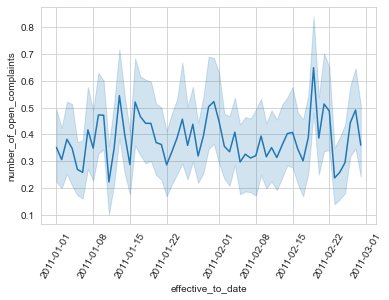

In [50]:
sns.lineplot(x="effective_to_date", y="number_of_open_complaints", data = customer_df);
plt.xticks(rotation=60)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

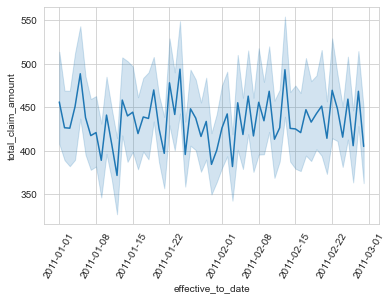

In [51]:
sns.lineplot(x="effective_to_date", y="total_claim_amount", data = customer_df);
plt.xticks(rotation=60)
plt.show


# Lab 4| Data cleaning and wrangling

In [52]:
## testing the stuff i gooogled for outliers

In [53]:
numerical = customer_df.select_dtypes(include=np.number)
numerical.head()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
customer,,,,,,,,
BU79786,2763.519279,56274.0,69,32,5,0,1,384.811147
QZ44356,6979.535903,33889.5,94,13,42,0,8,1131.464935
AI49188,12887.431650,48767.0,108,18,38,0,2,566.472247
WW63253,7645.861827,33889.5,106,18,65,0,7,529.881344
HB64268,2813.692575,43836.0,73,12,44,0,1,138.130879


In [54]:
numerical.shape

(9134, 8)

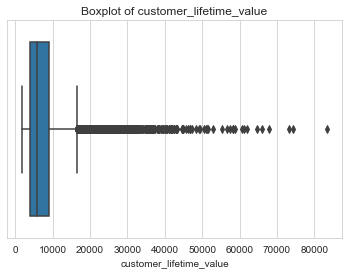

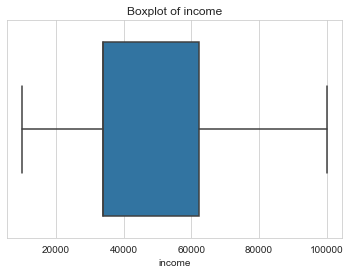

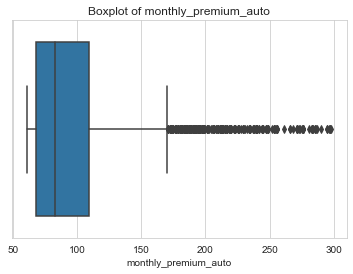

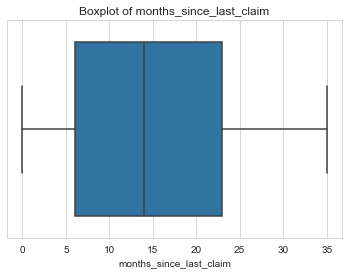

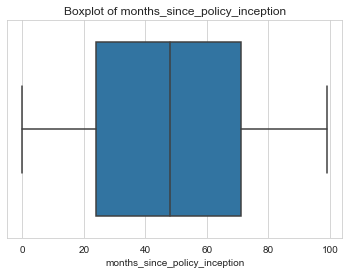

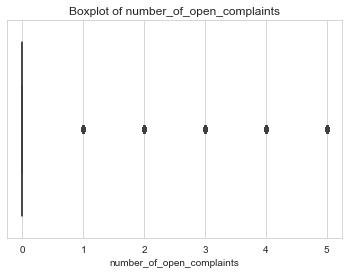

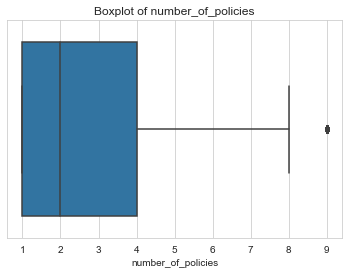

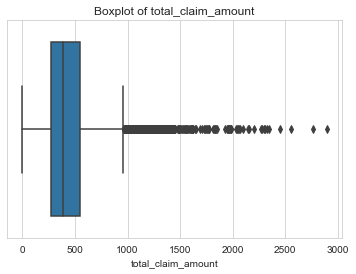

In [55]:
def plot_numerical(df):
    for i in df.columns:
        plt.figure()
        plt.title("Boxplot of {}".format(i))
        sns.boxplot(x=i, data=df)
        
plot_numerical(numerical)

In [56]:
from scipy import stats
import numpy as np
z = np.abs(stats.zscore(numerical))
print(z)

[[0.76287773 0.45136032 0.70392465 ... 0.42224956 0.82264788 0.16963969]
 [0.14924546 0.55697543 0.02269103 ... 0.42224956 2.10615996 2.400737  ]
 [0.71063622 0.11319881 0.42959581 ... 0.42224956 0.40424676 0.45573376]
 ...
 [0.02313483 0.55697543 0.23889062 ... 2.87324529 0.40424676 1.22793667]
 [0.06993547 1.09520946 0.08082028 ... 0.42224956 0.01415436 0.88511256]
 [0.78495478 0.55697543 0.47140763 ... 0.42224956 0.82264788 0.22200449]]


In [57]:
threshold = 2
print(np.where(z > 2))

(array([   1,    1,    6, ..., 9125, 9129, 9131], dtype=int64), array([6, 7, 6, ..., 7, 0, 5], dtype=int64))


In [58]:
numerical_z = numerical[(z < 2).all(axis=1)]

In [59]:
numerical_z.shape

(6625, 8)

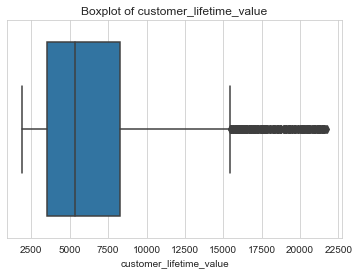

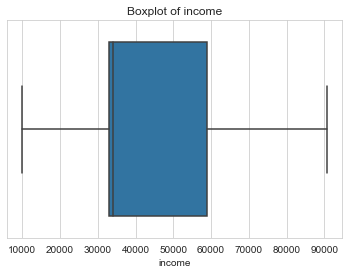

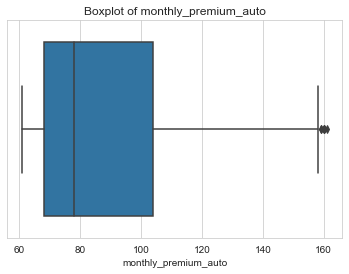

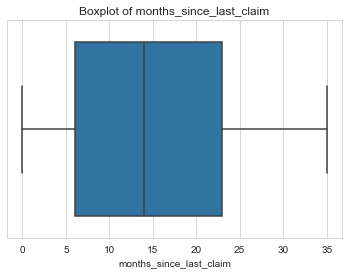

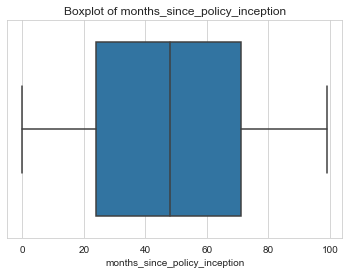

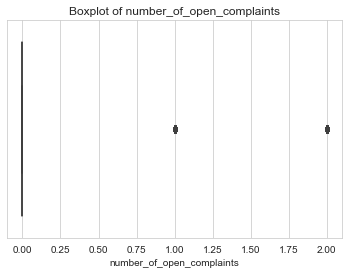

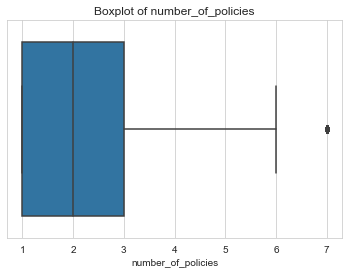

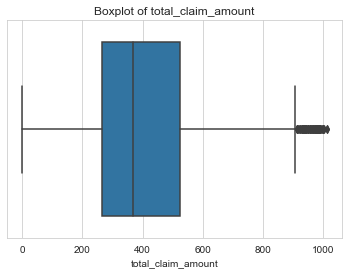

In [60]:
def plot_numerical_z(df):
    for i in df.columns:
        plt.figure()
        plt.title("Boxplot of {}".format(i))
        sns.boxplot(x=i, data=df)
        
plot_numerical_z(numerical_z)

In [61]:
numerical_z.head()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
customer,,,,,,,,
BU79786,2763.519279,56274.0,69,32,5,0,1,384.811147
AI49188,12887.431650,48767.0,108,18,38,0,2,566.472247
WW63253,7645.861827,33889.5,106,18,65,0,7,529.881344
HB64268,2813.692575,43836.0,73,12,44,0,1,138.130879
OC83172,8256.297800,62902.0,69,14,94,0,2,159.383042


In [62]:
numerical_z.isin([' ', '0', 0, '', np.nan]).sum()

customer_lifetime_value             0
income                              0
monthly_premium_auto                0
months_since_last_claim           219
months_since_policy_inception      59
number_of_open_complaints        5574
number_of_policies                  0
total_claim_amount                  0
dtype: int64

In [63]:
def log_transform_clean(x):
    if np.isfinite(x) and x!=0:
        return np.log(x)
    else:
        return np.NAN

In [64]:
numerical_z['customer_lifetime_value'] = list(map(log_transform_clean, numerical_z['customer_lifetime_value']))
numerical_z['monthly_premium_auto'] = list(map(log_transform_clean, numerical_z['monthly_premium_auto']))

In [65]:
numerical_z['customer_lifetime_value'].unique()

array([7.92426025, 9.46400782, 8.94191984, ..., 8.31883945, 8.92591199,
       7.86780903])

In [66]:
new_customer_df = customer_df
new_customer_df.head()

,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,location_code,marital_status,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
customer,,,,,,,,,,,,,,,,,,,,,,,
BU79786,Washington,2763.519279,No,Basic,Bachelor,2011-02-24,Employed,F,56274.0,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
QZ44356,Arizona,6979.535903,No,Extended,Bachelor,2011-01-31,Unemployed,F,33889.5,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
AI49188,Nevada,12887.431650,No,Premium,Bachelor,2011-02-19,Employed,F,48767.0,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
WW63253,California,7645.861827,No,Basic,Bachelor,2011-01-20,Unemployed,M,33889.5,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
HB64268,Washington,2813.692575,No,Basic,Bachelor,2011-02-03,Employed,M,43836.0,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [67]:
new_customer_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9134 entries, BU79786 to Y167826
Data columns (total 23 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   state                          9134 non-null   object        
 1   customer_lifetime_value        9134 non-null   float64       
 2   response                       9134 non-null   object        
 3   coverage                       9134 non-null   object        
 4   education                      9134 non-null   object        
 5   effective_to_date              9134 non-null   datetime64[ns]
 6   employmentstatus               9134 non-null   object        
 7   gender                         9134 non-null   object        
 8   income                         9134 non-null   float64       
 9   location_code                  9134 non-null   object        
 10  marital_status                 9134 non-null   object        
 11  monthly_premi

In [68]:
numerical_z

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
customer,,,,,,,,
BU79786,7.924260,56274.0,4.234107,32,5,0,1,384.811147
AI49188,9.464008,48767.0,4.682131,18,38,0,2,566.472247
WW63253,8.941920,33889.5,4.663439,18,65,0,7,529.881344
HB64268,7.942253,43836.0,4.290459,12,44,0,1,138.130879
OC83172,9.018732,62902.0,4.234107,14,94,0,2,159.383042
...,...,...,...,...,...,...,...,...
TF56202,8.523606,66367.0,4.158883,6,48,0,3,307.200000
YM19146,8.318839,47761.0,4.644391,16,58,0,1,541.282007
PK87824,8.038031,21604.0,4.369448,14,28,0,1,379.200000


In [69]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import Normalizer

transformer = MinMaxScaler().fit(numerical_z)
numerical_z_std = pd.DataFrame(transformer.transform(numerical_z), columns = numerical_z.columns, index = numerical_z.index)


In [70]:
numerical_z_std

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
customer,,,,,,,,
BU79786,0.150407,0.573874,0.126975,0.914286,0.050505,0.0,0.000000,0.379920
AI49188,0.784620,0.480700,0.588603,0.514286,0.383838,0.0,0.166667,0.559451
WW63253,0.569575,0.296047,0.569343,0.514286,0.656566,0.0,1.000000,0.523289
HB64268,0.157818,0.419499,0.185039,0.342857,0.444444,0.0,0.000000,0.136133
OC83172,0.601213,0.656138,0.126975,0.400000,0.949495,0.0,0.166667,0.157136
...,...,...,...,...,...,...,...,...
TF56202,0.397274,0.699144,0.049467,0.171429,0.484848,0.0,0.333333,0.303220
YM19146,0.312932,0.468214,0.549717,0.457143,0.585859,0.0,0.000000,0.534556
PK87824,0.197269,0.143565,0.266425,0.400000,0.282828,0.0,0.000000,0.374375


In [71]:
categorical.head()

,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
customer,,,,,,,,,,,,,,
BU79786,Washington,No,1,3,Employed,F,Suburban,Married,2,3,1,Agent,Two-Door Car,2
QZ44356,Arizona,No,2,3,Unemployed,F,Suburban,Single,1,3,3,Agent,Four-Door Car,2
AI49188,Nevada,No,3,3,Employed,F,Suburban,Married,1,3,1,Agent,Two-Door Car,2
WW63253,California,No,1,3,Unemployed,M,Suburban,Married,2,2,1,Call Center,SUV,2
HB64268,Washington,No,1,3,Employed,M,Rural,Single,1,1,1,Agent,Four-Door Car,2


In [72]:
categorical_enc= pd.get_dummies(categorical)

In [73]:
categorical_enc.isna().sum()

coverage                          0
education                         0
policy_type                       0
policy                            0
renew_offer_type                  0
vehicle_size                      0
state_Arizona                     0
state_California                  0
state_Nevada                      0
state_Oregon                      0
state_Washington                  0
response_No                       0
response_Yes                      0
employmentstatus_Disabled         0
employmentstatus_Employed         0
employmentstatus_Medical Leave    0
employmentstatus_Retired          0
employmentstatus_Unemployed       0
gender_F                          0
gender_M                          0
location_code_Rural               0
location_code_Suburban            0
location_code_Urban               0
marital_status_Divorced           0
marital_status_Married            0
marital_status_Single             0
sales_channel_Agent               0
sales_channel_Branch        

In [74]:
#new_customer_df = pd.concat(numerical_z_std.iloc[:,:-1], categorical_enc, customer_df['effective_to_date'], axis = 1)
#print("The dataset size is: ", new_customer_df.shape)

In [75]:
#numerical_z_std = pd.DataFrame()

In [76]:
numerical_z_std=numerical_z_std.reset_index()

In [77]:
categorical_enc = categorical_enc.reset_index()

In [78]:
customer_df['Day'] = customer_df['effective_to_date'].apply(lambda x: x.day)
customer_df['Week'] = customer_df['effective_to_date'].apply(lambda x: x.week)
customer_df['Month'] = customer_df['effective_to_date'].apply(lambda x: x.month)

In [79]:
customer_df

,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,location_code,marital_status,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,Day,Week,Month
customer,,,,,,,,,,,,,,,,,,,,,,,,,,
BU79786,Washington,2763.519279,No,Basic,Bachelor,2011-02-24,Employed,F,56274.0,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize,24,8,2
QZ44356,Arizona,6979.535903,No,Extended,Bachelor,2011-01-31,Unemployed,F,33889.5,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize,31,5,1
AI49188,Nevada,12887.431650,No,Premium,Bachelor,2011-02-19,Employed,F,48767.0,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize,19,7,2
WW63253,California,7645.861827,No,Basic,Bachelor,2011-01-20,Unemployed,M,33889.5,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize,20,3,1
HB64268,Washington,2813.692575,No,Basic,Bachelor,2011-02-03,Employed,M,43836.0,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize,3,5,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
LA72316,California,23405.987980,No,Basic,Bachelor,2011-02-10,Employed,M,71941.0,Urban,Married,73,18,89,0,2,Personal Auto,Personal L1,Offer2,Web,198.234764,Four-Door Car,Medsize,10,6,2
PK87824,California,3096.511217,Yes,Extended,College,2011-02-12,Employed,F,21604.0,Suburban,Divorced,79,14,28,0,1,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize,12,6,2
TD14365,California,8163.890428,No,Extended,Bachelor,2011-02-06,Unemployed,M,33889.5,Suburban,Single,85,9,37,3,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize,6,5,2


In [80]:
new_customer_df = pd.concat((categorical_enc,numerical_z_std), axis = 1)

In [81]:
new_customer_df

,customer,coverage,education,policy_type,policy,renew_offer_type,vehicle_size,state_Arizona,state_California,state_Nevada,state_Oregon,state_Washington,response_No,response_Yes,employmentstatus_Disabled,employmentstatus_Employed,employmentstatus_Medical Leave,employmentstatus_Retired,employmentstatus_Unemployed,gender_F,gender_M,location_code_Rural,location_code_Suburban,location_code_Urban,marital_status_Divorced,marital_status_Married,marital_status_Single,sales_channel_Agent,sales_channel_Branch,sales_channel_Call Center,sales_channel_Web,vehicle_class_Four-Door Car,vehicle_class_Luxury Car,vehicle_class_Luxury SUV,vehicle_class_SUV,vehicle_class_Sports Car,vehicle_class_Two-Door Car,customer,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,BU79786,1,3,2,3,1,2,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,1,BU79786,0.150407,0.573874,0.126975,0.914286,0.050505,0.0,0.000000,0.379920
1,QZ44356,2,3,1,3,3,2,1,0,0,0,0,1,0,0,0,0,0,1,1,0,0,1,0,0,0,1,1,0,0,0,1,0,0,0,0,0,AI49188,0.784620,0.480700,0.588603,0.514286,0.383838,0.0,0.166667,0.559451
2,AI49188,3,3,1,3,1,2,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,1,WW63253,0.569575,0.296047,0.569343,0.514286,0.656566,0.0,1.000000,0.523289
3,WW63253,1,3,2,2,1,2,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,HB64268,0.157818,0.419499,0.185039,0.342857,0.444444,0.0,0.000000,0.136133
4,HB64268,1,3,1,1,1,2,0,0,0,0,1,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,OC83172,0.601213,0.656138,0.126975,0.400000,0.949495,0.0,0.166667,0.157136
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,1,3,1,1,2,2,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,1,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9130,PK87824,2,2,2,3,1,2,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,1,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9131,TD14365,2,3,2,2,1,2,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9132,UP19263,2,2,1,2,3,3,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [82]:
new_customer_df=new_customer_df.drop(['customer'],axis = 1)

In [83]:
new_customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 44 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   coverage                        9134 non-null   int64  
 1   education                       9134 non-null   int64  
 2   policy_type                     9134 non-null   int64  
 3   policy                          9134 non-null   int64  
 4   renew_offer_type                9134 non-null   int64  
 5   vehicle_size                    9134 non-null   int64  
 6   state_Arizona                   9134 non-null   uint8  
 7   state_California                9134 non-null   uint8  
 8   state_Nevada                    9134 non-null   uint8  
 9   state_Oregon                    9134 non-null   uint8  
 10  state_Washington                9134 non-null   uint8  
 11  response_No                     9134 non-null   uint8  
 12  response_Yes                    91

In [84]:
new_customer_df.dropna()

,coverage,education,policy_type,policy,renew_offer_type,vehicle_size,state_Arizona,state_California,state_Nevada,state_Oregon,state_Washington,response_No,response_Yes,employmentstatus_Disabled,employmentstatus_Employed,employmentstatus_Medical Leave,employmentstatus_Retired,employmentstatus_Unemployed,gender_F,gender_M,location_code_Rural,location_code_Suburban,location_code_Urban,marital_status_Divorced,marital_status_Married,marital_status_Single,sales_channel_Agent,sales_channel_Branch,sales_channel_Call Center,sales_channel_Web,vehicle_class_Four-Door Car,vehicle_class_Luxury Car,vehicle_class_Luxury SUV,vehicle_class_SUV,vehicle_class_Sports Car,vehicle_class_Two-Door Car,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,1,3,2,3,1,2,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0.150407,0.573874,0.126975,0.914286,0.050505,0.0,0.000000,0.379920
1,2,3,1,3,3,2,1,0,0,0,0,1,0,0,0,0,0,1,1,0,0,1,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0.784620,0.480700,0.588603,0.514286,0.383838,0.0,0.166667,0.559451
2,3,3,1,3,1,2,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0.569575,0.296047,0.569343,0.514286,0.656566,0.0,1.000000,0.523289
3,1,3,2,2,1,2,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0.157818,0.419499,0.185039,0.342857,0.444444,0.0,0.000000,0.136133
4,1,3,1,1,1,2,0,0,0,0,1,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0.601213,0.656138,0.126975,0.400000,0.949495,0.0,0.166667,0.157136
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6620,1,3,1,3,3,2,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,1,0.397274,0.699144,0.049467,0.171429,0.484848,0.0,0.333333,0.303220
6621,1,2,1,3,3,2,0,0,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0.312932,0.468214,0.549717,0.457143,0.585859,0.0,0.000000,0.534556
6622,1,2,2,3,1,2,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0.197269,0.143565,0.266425,0.400000,0.282828,0.0,0.000000,0.374375
6623,3,1,1,3,3,3,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0.562981,0.147747,0.467244,0.971429,0.030303,0.0,0.333333,0.682716


# Lab 5 Comparing regression models

In [93]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.metrics import r2_score
from sklearn import linear_model
X = new_customer_df.drop(['total_claim_amount'], axis=1) 
Y = new_customer_df['total_claim_amount']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.4, random_state=100)

In [94]:
X.dropna()

,coverage,education,policy_type,policy,renew_offer_type,vehicle_size,state_Arizona,state_California,state_Nevada,state_Oregon,state_Washington,response_No,response_Yes,employmentstatus_Disabled,employmentstatus_Employed,employmentstatus_Medical Leave,employmentstatus_Retired,employmentstatus_Unemployed,gender_F,gender_M,location_code_Rural,location_code_Suburban,location_code_Urban,marital_status_Divorced,marital_status_Married,marital_status_Single,sales_channel_Agent,sales_channel_Branch,sales_channel_Call Center,sales_channel_Web,vehicle_class_Four-Door Car,vehicle_class_Luxury Car,vehicle_class_Luxury SUV,vehicle_class_SUV,vehicle_class_Sports Car,vehicle_class_Two-Door Car,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies
0,1,3,2,3,1,2,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0.150407,0.573874,0.126975,0.914286,0.050505,0.0,0.000000
1,2,3,1,3,3,2,1,0,0,0,0,1,0,0,0,0,0,1,1,0,0,1,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0.784620,0.480700,0.588603,0.514286,0.383838,0.0,0.166667
2,3,3,1,3,1,2,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0.569575,0.296047,0.569343,0.514286,0.656566,0.0,1.000000
3,1,3,2,2,1,2,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0.157818,0.419499,0.185039,0.342857,0.444444,0.0,0.000000
4,1,3,1,1,1,2,0,0,0,0,1,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0.601213,0.656138,0.126975,0.400000,0.949495,0.0,0.166667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6620,1,3,1,3,3,2,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,1,0.397274,0.699144,0.049467,0.171429,0.484848,0.0,0.333333
6621,1,2,1,3,3,2,0,0,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0.312932,0.468214,0.549717,0.457143,0.585859,0.0,0.000000
6622,1,2,2,3,1,2,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0.197269,0.143565,0.266425,0.400000,0.282828,0.0,0.000000
6623,3,1,1,3,3,3,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0.562981,0.147747,0.467244,0.971429,0.030303,0.0,0.333333


In [95]:
Y.dropna()

0       0.379920
1       0.559451
2       0.523289
3       0.136133
4       0.157136
          ...   
6620    0.303220
6621    0.534556
6622    0.374375
6623    0.682716
6624    0.364888
Name: total_claim_amount, Length: 6625, dtype: float64

In [96]:
test1 = new_customer_df.copy()

In [97]:
test1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 44 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   coverage                        9134 non-null   int64  
 1   education                       9134 non-null   int64  
 2   policy_type                     9134 non-null   int64  
 3   policy                          9134 non-null   int64  
 4   renew_offer_type                9134 non-null   int64  
 5   vehicle_size                    9134 non-null   int64  
 6   state_Arizona                   9134 non-null   uint8  
 7   state_California                9134 non-null   uint8  
 8   state_Nevada                    9134 non-null   uint8  
 9   state_Oregon                    9134 non-null   uint8  
 10  state_Washington                9134 non-null   uint8  
 11  response_No                     9134 non-null   uint8  
 12  response_Yes                    91

In [98]:
test2 = new_customer_df.copy()

In [101]:
lm = linear_model.LinearRegression()
model = lm.fit(X_train,Y_train)
predictions  = lm.predict(X_test)
print('Model used: LinearRegressor Model -- Target: ',column_to_drop)
sns.scatterplot(y = predictions, X = Y_test)
plt.show()

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [102]:
from sklearn.neighbors import KNeighborsRegressor

knn_model = KNeighborsRegressor(n_neighbors=4) 
knn_model.fit(X_train, Y_train)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

# Lab 6

In [ ]:
numerical

In [ ]:
sns.distplot(numerical)
plt.title("Distplot of )
plt.show()

In [ ]:
cols=numerical.columns
def distplot_num(df):
    for col in cols:
        sns.distplot(df[col])
        plt.title("Distplot of {}".format(i))
        plt.show()
distplot_num(numerical)

In [ ]:
def log_transfom_clean(x):
    if np.isfinite(x) and x!=0:
        return np.log(x)
    else:
        return np.NAN 

In [ ]:
for col in cols:
        sns.distplot(df[col])
        plt.title("Distplot of {}".format(i))
        plt.show()
distplot_num(numerical)